In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,classification_report,recall_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

from sklearn.feature_selection import SelectKBest,chi2
import gc

from imblearn.ensemble import BalancedRandomForestClassifier,RUSBoostClassifier

from sklearn.decomposition import TruncatedSVD

Using TensorFlow backend.


In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [5]:
id(df)

1834049565248

In [7]:
df.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [96]:
df_only_num=df.copy()

In [97]:
df_only_num.drop(['loan_id','source','financial_institution','loan_to_value','origination_date','first_payment_date','loan_purpose'],axis=1,inplace=True)

In [98]:
#df_only_num['mt']=df_only_num.m1+df_only_num.m2+df_only_num.m3+df_only_num.m4+df_only_num.m5+df_only_num.m6+df_only_num.m7+df_only_num.m8+df_only_num.m9+df_only_num.m10+df_only_num.m11+df_only_num.m12

In [99]:
#df_only_num['mk']=df_only_num.mt.apply(lambda x:1 if x>0 else 0)

In [100]:
df_only_num.dtypes

interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                           int64
dtype: object

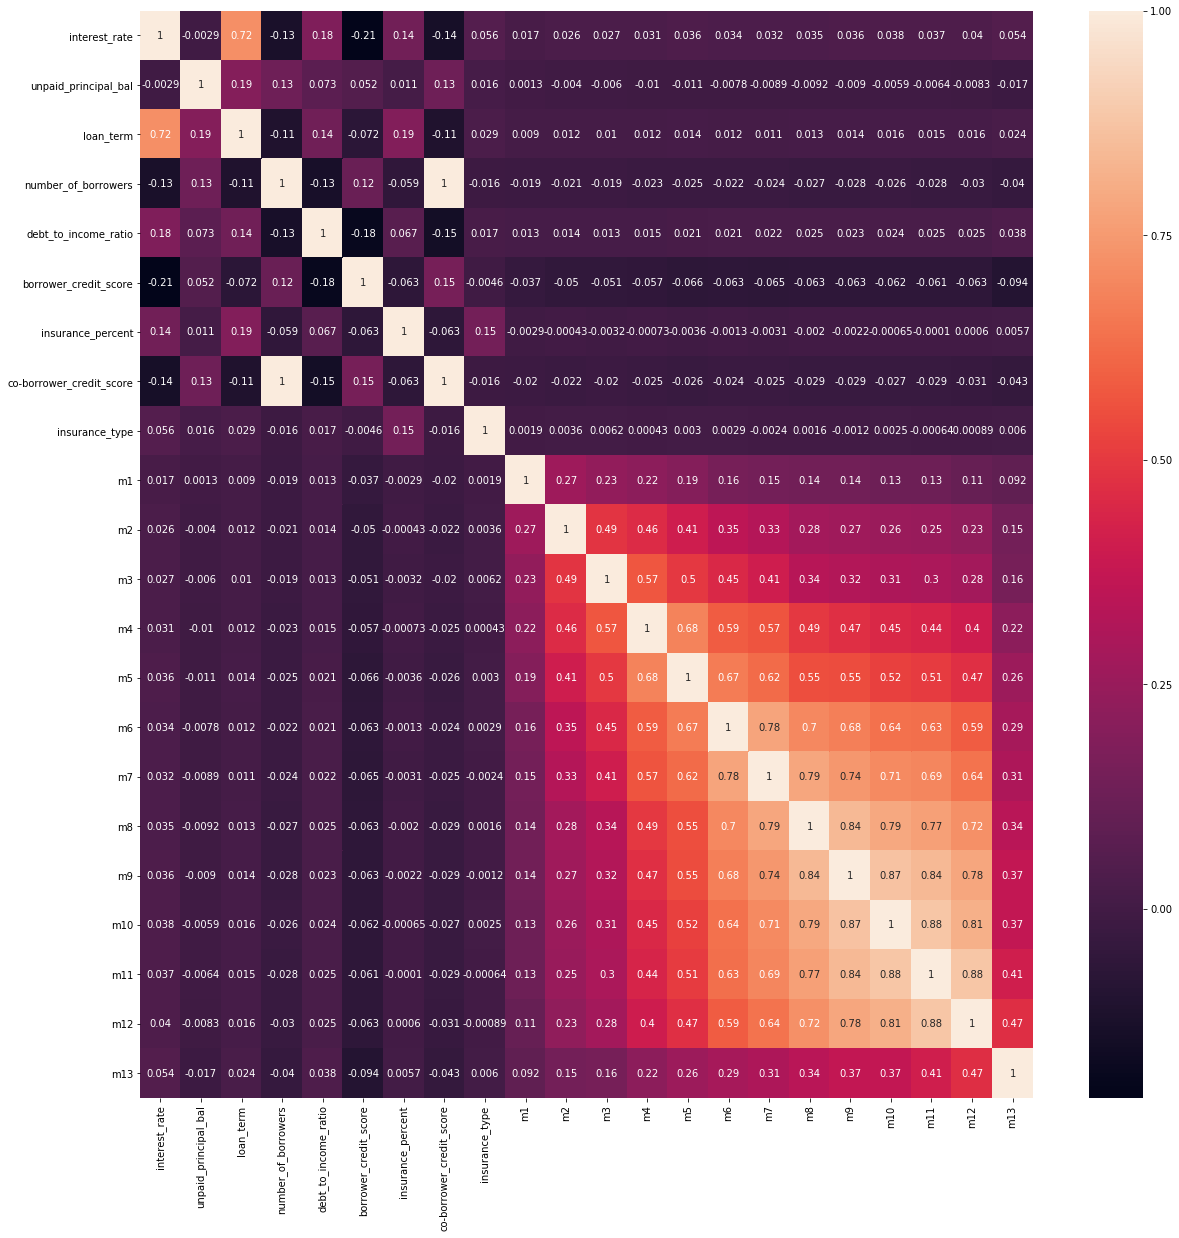

In [101]:

plt.figure(figsize=(20,20))
sns.heatmap(df_only_num.corr(),annot=True)

In [102]:
y=df_only_num.m13
df_only_num.drop(['m13'],axis=1,inplace=True)

In [25]:
df_only_num.dtypes

interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
mt                            int64
mk                            int64
dtype: object

In [103]:
X=df_only_num.m12.values

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X.reshape(-1,1),y,test_size=0.2)

In [53]:
y_train.shape

(92846,)

In [54]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred=lg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23081
           1       0.90      0.21      0.35       131

    accuracy                           1.00     23212
   macro avg       0.95      0.61      0.67     23212
weighted avg       1.00      1.00      0.99     23212



In [107]:
X=df_only_num.values

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
xg=xgb.XGBClassifier()

In [30]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [31]:
y_pred=xg.predict(X_test)

In [32]:
f1_score(y_pred,y_test)

0.4947368421052632

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23082
           1       0.78      0.36      0.49       130

    accuracy                           1.00     23212
   macro avg       0.89      0.68      0.75     23212
weighted avg       1.00      1.00      1.00     23212



In [34]:
lg=LogisticRegression()

In [35]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred=lg.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23082
           1       0.74      0.11      0.19       130

    accuracy                           0.99     23212
   macro avg       0.87      0.55      0.59     23212
weighted avg       0.99      0.99      0.99     23212



In [2]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [109]:
X_train.shape

(92846, 21)

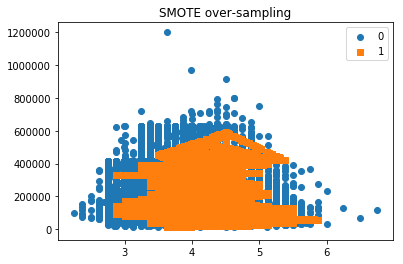

In [110]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [111]:
xg=xgb.XGBClassifier()
xg.fit(X_sm, y_sm)
y_pred=xg.predict(X_test)

In [126]:
print(f1_score(y_test,y_pred))

0.43678160919540227


In [112]:
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23064
           1       0.42      0.48      0.45       148

    accuracy                           0.99     23212
   macro avg       0.71      0.74      0.72     23212
weighted avg       0.99      0.99      0.99     23212



In [113]:
lm=lgb.LGBMClassifier()

In [114]:
lm.fit(X_sm, y_sm)
y_pred=lm.predict(X_test)

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23064
           1       0.50      0.39      0.44       148

    accuracy                           0.99     23212
   macro avg       0.75      0.69      0.72     23212
weighted avg       0.99      0.99      0.99     23212



In [118]:


dt=pd.read_csv('test.csv')
l1=dt.loan_id
dt.drop(['loan_id','source','financial_institution','loan_to_value','origination_date','first_payment_date','loan_purpose'],axis=1,inplace=True)
#dt['mt']=dt.m1+dt.m2+dt.m3+dt.m4+dt.m5+dt.m6+dt.m7+dt.m8+dt.m9+dt.m10+dt.m11+dt.m12

#dt['mk']=dt.mt.apply(lambda x:1 if x>0 else 0)

#dt.drop(['m13'],axis=1,inplace=True)

Xt=dt.values

In [119]:
ypr=xg.predict(Xt)

In [120]:
ypr2=lm.predict(Xt)

In [21]:
def checkDist(y):

    unique_elements, counts_elements = np.unique(y, return_counts=True)

    print("Frequency of unique values of the said array: y ")
    print(np.asarray((unique_elements, counts_elements)))
    print('\n')
    print('\n')
    print('\n')

In [122]:
checkDist(ypr)

Frequency of unique values of the said array: y 
[[    0     1]
 [35592   274]]








In [123]:
checkDist(ypr2)

Frequency of unique values of the said array: y 
[[    0     1]
 [35709   157]]








In [124]:

tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_XGboost_Withtune_101.csv',index=False)


tp1=pd.DataFrame({'loan_id':l1,'m13':ypr2})

tp1.to_csv('Submission_LightGBM_tune_101.csv',index=False)

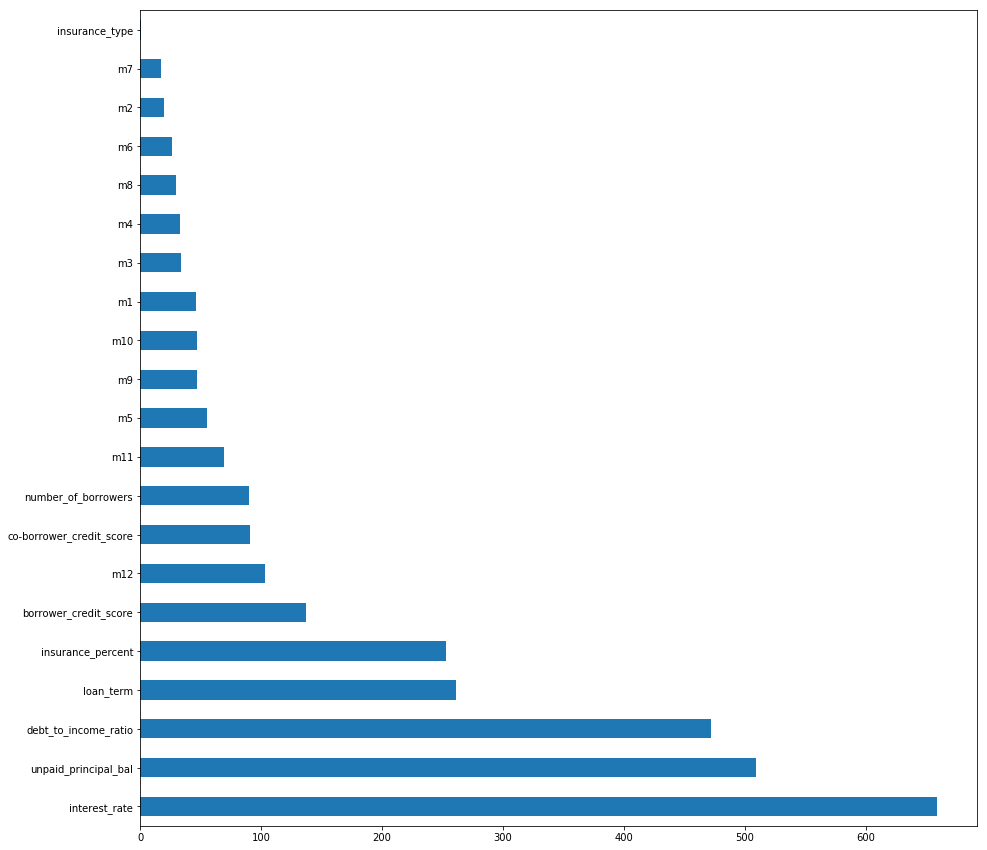

In [125]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(lm.feature_importances_, index=df_only_num.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [179]:
df=pd.read_csv('train.csv')

df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

df['first_payment_month']=df.first_payment_month.astype('object')
df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

df['origination_month']=df.origination_month.astype('object')
y=df.m13.values

In [180]:
df.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [181]:
#df.drop(['loan_id','m13'],axis=1,inplace=True)


df.drop(['origination_date','first_payment_date','loan_id','m13'],axis=1,inplace=True)



In [182]:
df=pd.get_dummies(df)

In [183]:
X=df.values

In [184]:
X.shape

(116058, 54)

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

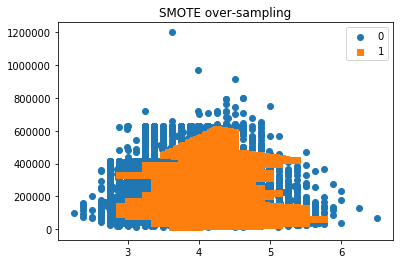

In [186]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [187]:
xg=xgb.XGBClassifier()
xg.fit(X_sm, y_sm)
y_pred=xg.predict(X_test)

In [188]:
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.5909090909090909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23090
           1       0.66      0.53      0.59       122

    accuracy                           1.00     23212
   macro avg       0.83      0.77      0.79     23212
weighted avg       1.00      1.00      1.00     23212



In [189]:
lm=lgb.LGBMClassifier()

In [190]:
lm.fit(X_sm, y_sm)
y_pred=lm.predict(X_test)

In [191]:
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.5185185185185185
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23090
           1       0.60      0.46      0.52       122

    accuracy                           1.00     23212
   macro avg       0.80      0.73      0.76     23212
weighted avg       1.00      1.00      1.00     23212



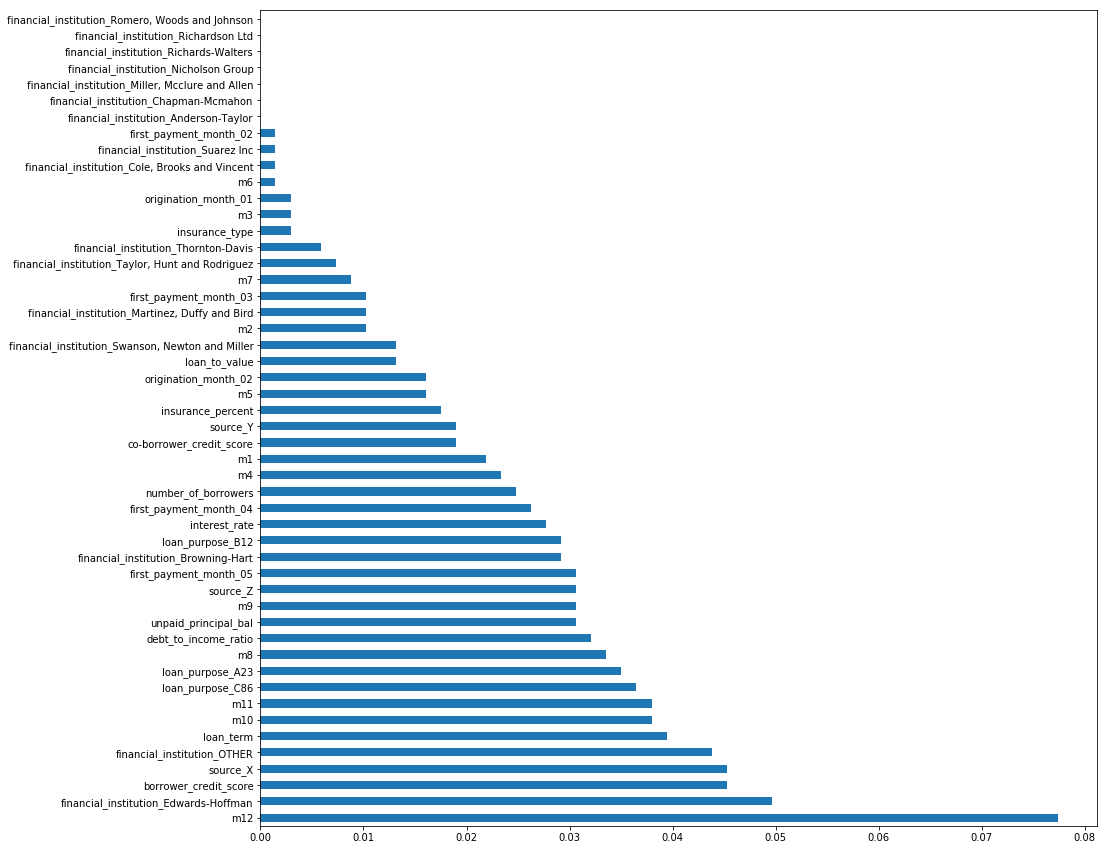

In [199]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(xg.feature_importances_, index=df.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [193]:


month_to_num={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
dt=pd.read_csv('test.csv')
l1=dt.loan_id

#dt['mt']=dt.m1+dt.m2+dt.m3+dt.m4+dt.m5+dt.m6+dt.m7+dt.m8+dt.m9+dt.m10+dt.m11+dt.m12

#dt['mk']=dt.mt.apply(lambda x:1 if x>0 else 0)

#dt.drop(['m13'],axis=1,inplace=True)

dt['first_payment_month']=dt.first_payment_date.apply(lambda x:month_to_num[x.split('-')[0]])

dt['first_payment_month']=dt.first_payment_month.astype('object')
dt['origination_month']=dt.origination_date.apply(lambda x:x.split('/')[1])

dt['origination_month']=dt.origination_month.astype('object')

dt.drop(['origination_date','first_payment_date','loan_id'],axis=1,inplace=True)

dt=pd.get_dummies(dt)
Xt=dt.values

In [194]:
dt.dtypes

interest_rate                                        float64
unpaid_principal_bal                                   int64
loan_term                                              int64
loan_to_value                                          int64
number_of_borrowers                                    int64
debt_to_income_ratio                                   int64
borrower_credit_score                                  int64
insurance_percent                                      int64
co-borrower_credit_score                               int64
insurance_type                                         int64
m1                                                     int64
m2                                                     int64
m3                                                     int64
m4                                                     int64
m5                                                     int64
m6                                                     int64
m7                      

In [195]:
Xt.shape

(35866, 54)

In [196]:
ypr=xg.predict(Xt)

In [197]:
ypr2=lm.predict(Xt)

In [198]:
ypr=xg.predict(Xt)
ypr2=lm.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_XGboost_Withtune_101.csv',index=False)


tp1=pd.DataFrame({'loan_id':l1,'m13':ypr2})

tp1.to_csv('Submission_LightGBM_tune_101.csv',index=False)

In [220]:
df=pd.read_csv('train.csv')

df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

df['first_payment_month']=df.first_payment_month.astype('int')
df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

df['origination_month']=df.origination_month.astype('int')
y=df.m13.values

In [497]:
df=pd.read_csv('train.csv')

df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

df['first_payment_month']=df.first_payment_month.astype('int')
df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

df['origination_month']=df.origination_month.astype('int')
y=df.m13.values

df.drop(['origination_date','first_payment_date','loan_id','m13'],axis=1,inplace=True)

df=pd.get_dummies(df)
X=df.values



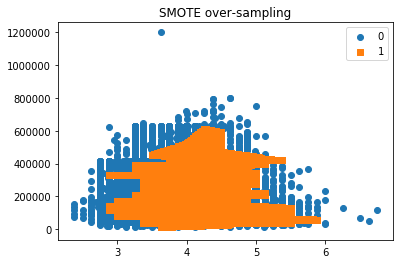

In [498]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [499]:
df.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'first_payment_month', 'origination_month', 'source_X', 'source_Y',
       'source_Z', 'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
     

In [500]:
df_new=pd.DataFrame(X_sm,columns=df.columns)


In [501]:
df_ts=pd.DataFrame(X_test,columns=df.columns)

In [502]:
df_new.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,59000.0,360.0,75.0,2.0,25.0,793.0,0.0,781.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.125,192000.0,360.0,94.0,1.0,23.0,751.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.125,63000.0,120.0,24.0,2.0,10.0,820.0,0.0,811.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.875,341000.0,360.0,55.0,1.0,27.0,743.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.875,292000.0,360.0,80.0,1.0,38.0,712.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [503]:
df_new.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'first_payment_month', 'origination_month', 'source_X', 'source_Y',
       'source_Z', 'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
     

In [504]:
features=['interest_rate', 'unpaid_principal_bal', 'loan_to_value',
        'debt_to_income_ratio', 'borrower_credit_score',
        'co-borrower_credit_score', 'm12',
       'first_payment_month',  'source_Y',

      
         'financial_institution_Edwards-Hoffman',
       'financial_institution_OTHER',
   
     
      
       'loan_purpose_B12']

In [505]:
X=df[features].values

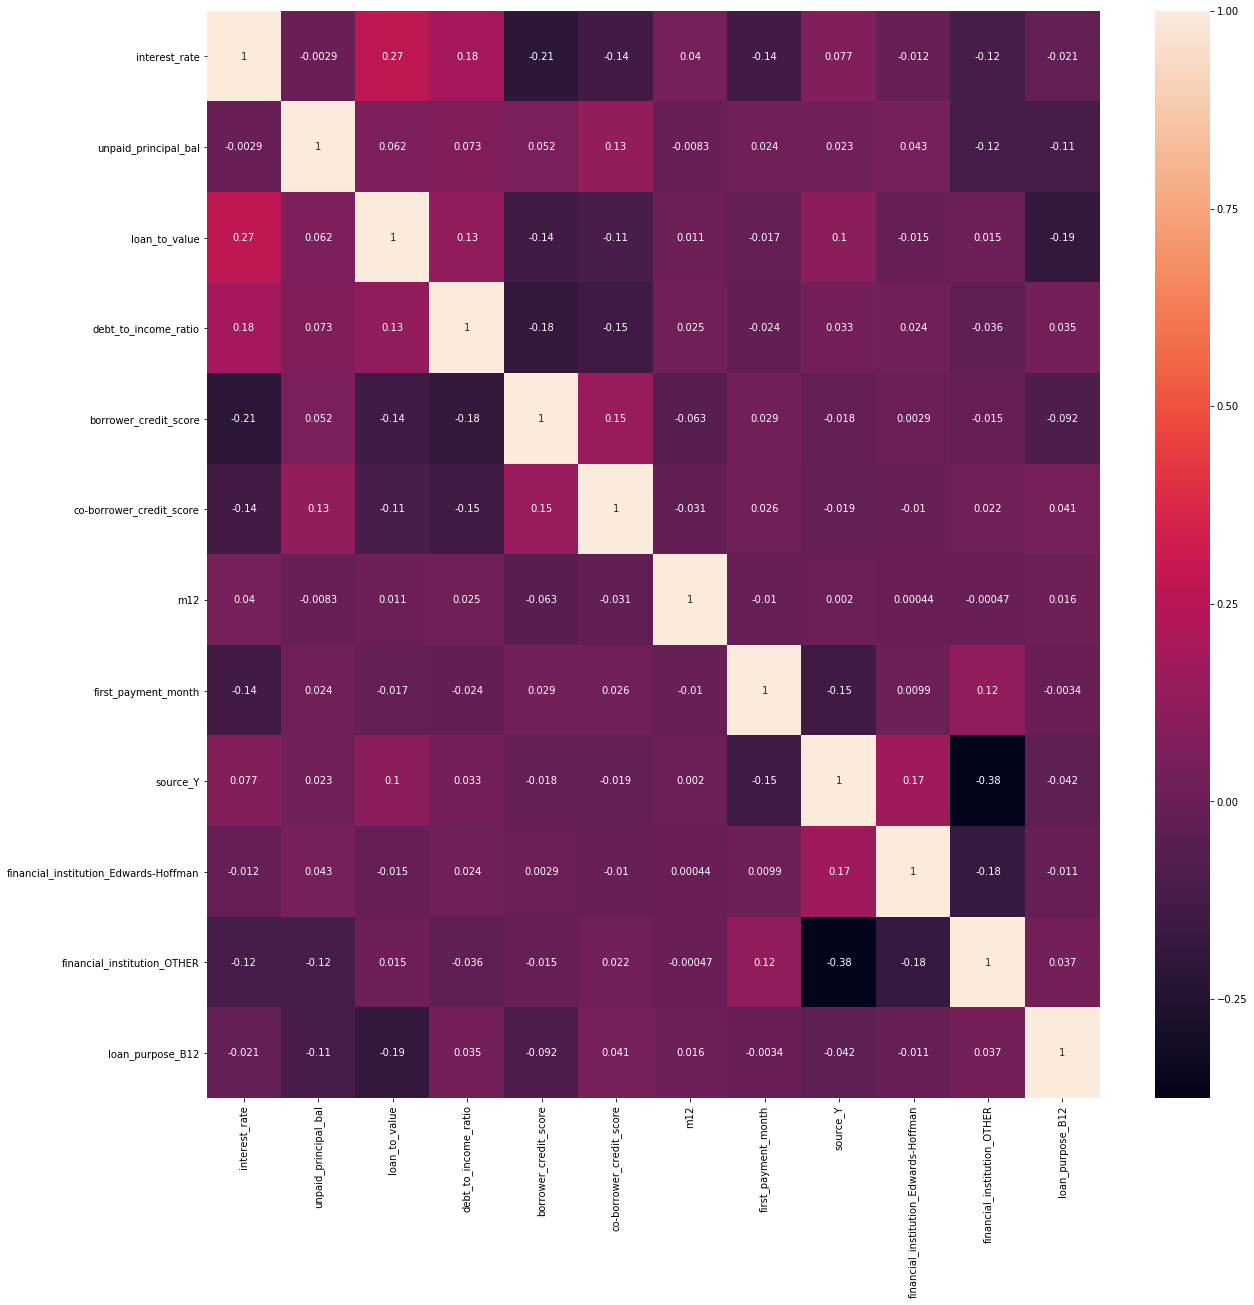

In [506]:
plt.figure(figsize=(20,20))
sns.heatmap(df[features].corr(),annot=True)

In [507]:
X_test=df_ts[features].values

In [508]:
X.shape

(116058, 12)

In [509]:
X_n=df_new[features].values

In [510]:
X_test

array([[3.750e+00, 9.800e+04, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.500e+00, 1.140e+05, 7.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.875e+00, 2.330e+05, 9.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [4.000e+00, 1.490e+05, 9.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.250e+00, 4.950e+05, 8.300e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.750e+00, 1.830e+05, 6.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [511]:
X_n.shape

(184700, 12)

In [512]:
y_sm.shape

(184700,)

In [513]:
X_test.shape

(23212, 12)

In [514]:
xg=xgb.XGBClassifier()
xg.fit(X_n, y_sm)
y_pred=xg.predict(X_test)

In [515]:
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5228215767634855
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23072
           1       0.62      0.45      0.52       140

    accuracy                           1.00     23212
   macro avg       0.81      0.72      0.76     23212
weighted avg       0.99      1.00      0.99     23212



In [516]:
lm=lgb.LGBMClassifier()

In [517]:
lm.fit(X_n, y_sm)
y_pred=lm.predict(X_test)

In [518]:
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.49090909090909096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23072
           1       0.68      0.39      0.49       140

    accuracy                           1.00     23212
   macro avg       0.84      0.69      0.74     23212
weighted avg       0.99      1.00      0.99     23212



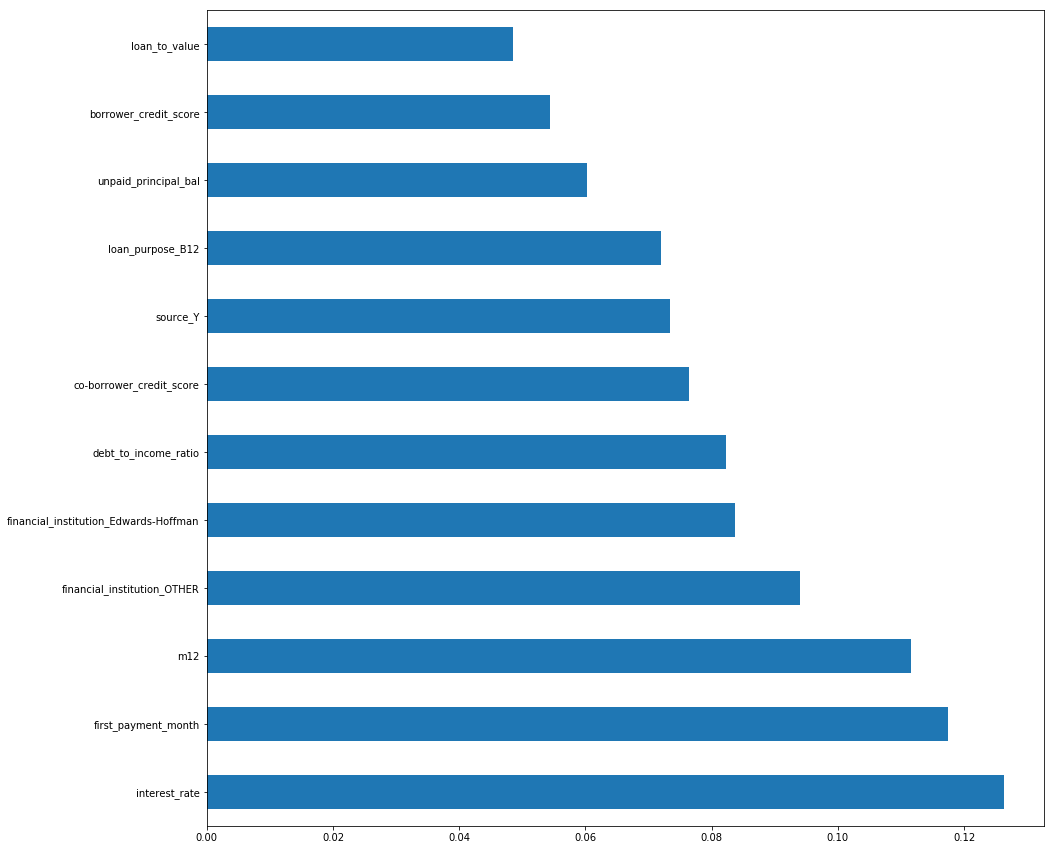

In [519]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(xg.feature_importances_, index=df[features].columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

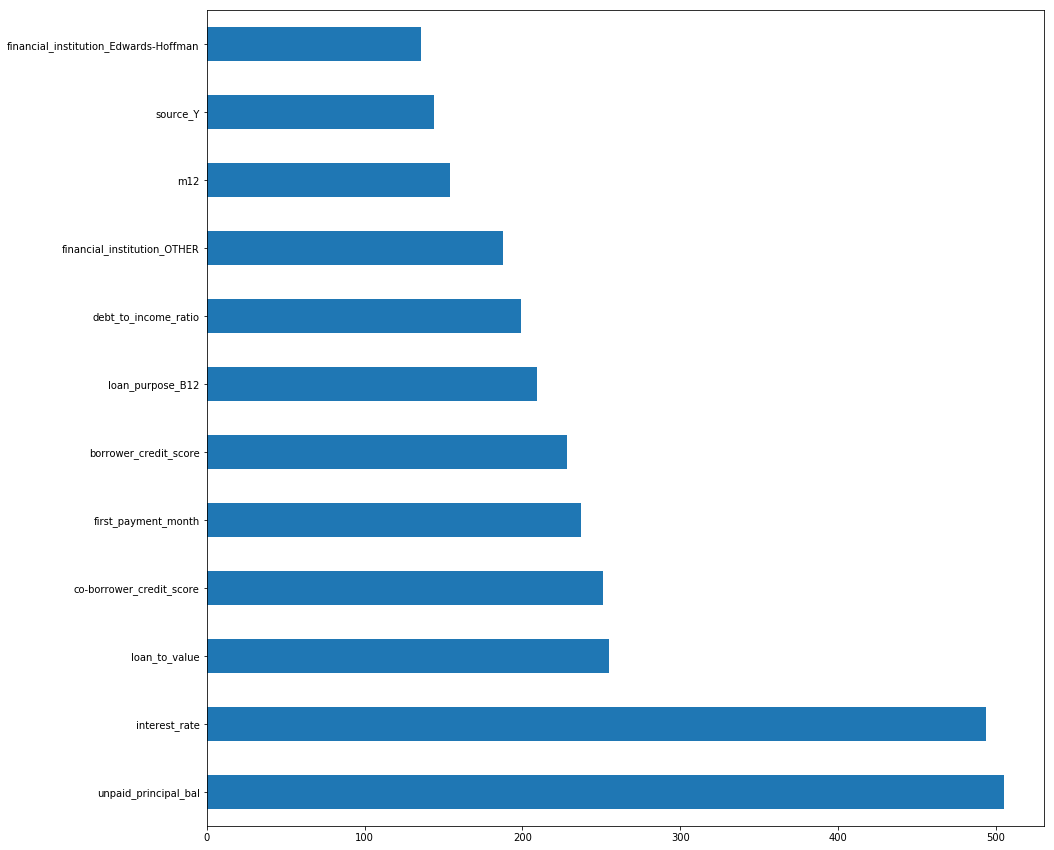

In [520]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(lm.feature_importances_, index=df[features].columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [521]:


month_to_num={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
dt=pd.read_csv('test.csv')
l1=dt.loan_id

#dt['mt']=dt.m1+dt.m2+dt.m3+dt.m4+dt.m5+dt.m6+dt.m7+dt.m8+dt.m9+dt.m10+dt.m11+dt.m12

#dt['mk']=dt.mt.apply(lambda x:1 if x>0 else 0)

#dt.drop(['m13'],axis=1,inplace=True)

dt['first_payment_month']=dt.first_payment_date.apply(lambda x:month_to_num[x.split('-')[0]])

dt['first_payment_month']=dt.first_payment_month.astype('int')
dt['origination_month']=dt.origination_date.apply(lambda x:x.split('/')[1])

dt['origination_month']=dt.origination_month.astype('int')

dt.drop(['origination_date','first_payment_date','loan_id'],axis=1,inplace=True)

dt=pd.get_dummies(dt)
Xt=dt[features].values



In [522]:
ypr=xg.predict(Xt)
ypr2=lm.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_XGboost_Withtune_102.csv',index=False)


tp1=pd.DataFrame({'loan_id':l1,'m13':ypr2})

tp1.to_csv('Submission_LightGBM_tune_102.csv',index=False)

In [523]:
checkDist(ypr)

Frequency of unique values of the said array: y 
[[    0     1]
 [35729   137]]








In [524]:
checkDist(ypr2)

Frequency of unique values of the said array: y 
[[    0     1]
 [35757   109]]








In [247]:
df=pd.read_csv('train.csv')

df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

df['first_payment_month']=df.first_payment_month.astype('int')
df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

df['origination_month']=df.origination_month.astype('int')
y=df.m13.values

df.drop(['origination_date','first_payment_date','loan_id','m13'],axis=1,inplace=True)

df=pd.get_dummies(df)

In [248]:
X=df.values

In [249]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

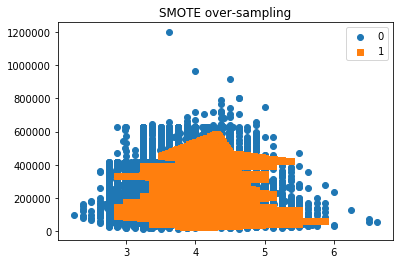

In [250]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [251]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_sm, y_sm)



In [252]:
print('Optimal number of features :', rfecv.n_features_)


Optimal number of features : 36


In [253]:
y_pred=rfecv.predict(X_test)

In [254]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [255]:
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.43478260869565216
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23089
           1       0.66      0.33      0.43       123

    accuracy                           1.00     23212
   macro avg       0.83      0.66      0.72     23212
weighted avg       0.99      1.00      0.99     23212



In [256]:

ypr3=rfecv.predict(Xt)
tp3=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp3.to_csv('Submission_RFFCV_Withtune_101.csv',index=False)

ValueError: X has a different shape than during fitting.